# Validation of Pair Morse Shielded Tap

This pair style was developed as a standalone vdW interaction inspired by ReaxFF. Below we show that the implemented pair style reproduces the pair style reax/c when all other terms than vdW are turned off. We provide validation based on an equation of state for NaCl crystal and a 2-atom system. The functional form of the Morse Shielded Tap (MST) pair potential is as follow:

$E_{MST} = Tap\cdot D_{0_{ij}}\left[e^{\alpha_{ij}\left(1-\frac{f_{13}(r_{ij})}{r_{vdW}}\right)}-2e^{\frac{1}{2}\alpha_{ij}\left(1-\frac{f_{13}(r_{ij})}{r_{vdW}}\right)}\right]$

$f_{13}(r_{ij}) = \left[r_{ij}^{p_{vdW1}}+\left(\frac{1}{\gamma_w}\right)^{p_{vdW1}}\right]^{p_{vdW1}}$

The $Tap$ function is a parameter free polyomial that insures the vdW potential goes to zero at a given cutoff. More details in the SI of:

“A ReaxFF Reactive Force Field for Molecular Dynamics Simulations of Hydrocarbon Oxidation” by Kimberly Chenoweth, Adri C.T. van Duin and William A. Goddard, III

## EOS NaCl crystal

### ReaxFF

We use TiO2/water May 2011 force field that includes Na & Cl elements. 
It is not very important the quality of the parameters and any other set of elements could be used for validation purpose.
We need to turn off all contributions but vdW. This is achieved by removing all bond, off-diagonal, angle, dihedral and HB parameters.
We also set to zero the lone pair parameters: Valency angle/lone pair parameter & Valency/lone pair parameter general parameters. Moreover, the Elp per-type was also set to zero. 
Finally, to eliminate Coulomb contributions, charges were set to zero.

Equation of state was performed with the following LAMMPS script.

And the modified force field file.

A grep gives the following energies. We verify that there is only vdW not null.

In [1]:
ene_reax = []
r_reax = []
f = open("ene_reax","r")
r = f.readlines()
f.close()
for line in r: 
    ene_reax.append(float(line.split()[2]))
    r_reax.append(float(line.split()[1]))

### Morse Shielded Tap

pair_style morse/shielded/tap args

args = cutoff<br />
cutoff = global cutoff for Morse interactions (distance units)
  
The following coefficients must be defined for each pair of atoms types via the pair_coeff command as in the examples below, or in the data file or restart files read by the read_data or read_restart commands:

- d0 --> Evdw
- alpha --> alfa
- gamma_w --> gammavdW
- p_vdW1/gp --> vdWaals shielding
- r_vdw --> Rvdw

Note:
1. all coefficients are given directly by their respective values in the force field file (-->)
2. you must define all pair coefficients in the input file as geometric mix i.e. $\sqrt{\alpha_i\alpha_j}$

The input file to define the EOS with MST is provided below.

A grep gives the energies.

In [14]:
ene_morse_shielded_tap = []
r_morse_shielded_tap = []
f = open("ene_morse_shielded_tap","r")
r = f.readlines()
f.close()
for line in r: 
    ene_morse_shielded_tap.append(float(line.split()[-1]))
    r_morse_shielded_tap.append(float(line.split()[-2]))

The equivalent of Morse coefficients are as follow:

- d0
- alpha/2r0
- r0 = 2r_vdw

In [15]:
ene_morse = []
r_morse = []
f = open("ene_morse","r")
r = f.readlines()
f.close()
for line in r: 
    ene_morse.append(float(line.split()[-1]))
    r_morse.append(float(line.split()[-2]))

In [16]:
ene_morse_shielded = []
r_morse_shielded = []
f = open("ene_morse_shielded","r")
r = f.readlines()
f.close()
for line in r: 
    ene_morse_shielded.append(float(line.split()[-1]))
    r_morse_shielded.append(float(line.split()[-2]))

Let's plot and compare the 2 models.

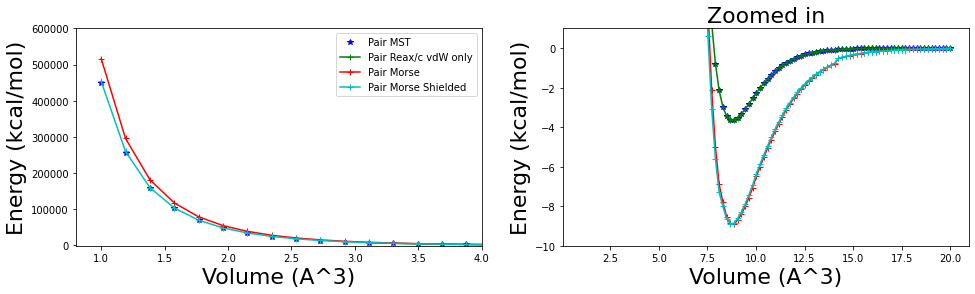

In [24]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.plot(r_morse_shielded_tap,ene_morse_shielded_tap,marker='*',color='b',lw=0, label="Pair MST")
plt.plot(r_reax,ene_reax,marker='+',color='g', label="Pair Reax/c vdW only")
plt.plot(r_morse,ene_morse,marker='+',color='r', label="Pair Morse")
plt.plot(r_morse_shielded,ene_morse_shielded,marker='+',color='c', label="Pair Morse Shielded")
plt.xlabel("Volume (A^3)",fontsize=22)
plt.ylabel("Energy (kcal/mol)",fontsize=22)
plt.legend()
plt.ylim(-1000,600000)
plt.xlim(0.8,4)

plt.subplot(122)
plt.title("Zoomed in",fontsize=22)
plt.plot(r_morse_shielded_tap,ene_morse_shielded_tap,marker='*',color='b',lw=0, label="Pair MST")
plt.plot(r_reax,ene_reax,marker='+',color='g', label="Pair Reax/c vdW only")
plt.plot(r_morse,ene_morse,marker='+',color='r', label="Pair Morse")
plt.plot(r_morse_shielded,ene_morse_shielded,marker='+',color='c', label="Pair Morse Shielded")
plt.ylim(-10,1)
plt.xlabel("Volume (A^3)",fontsize=22)
plt.ylabel("Energy (kcal/mol)",fontsize=22)
plt.show()

This validates the MST model as an equivalent of vdW potential in ReaxFF. One can further appreciate the shielding comparing MST with pure Morse in the limit of small volume.

## Force between 2-atoms

We have validated MST model reproduces well the energies of pure vdW in ReaxFF, let's now validate the forces.

### ReaxFF

Here we study the vdW force between 2 isolated atoms.
We use the same force field as before and the input file is as follow.

### Morse Shielded Tap

The input file is similar as above.

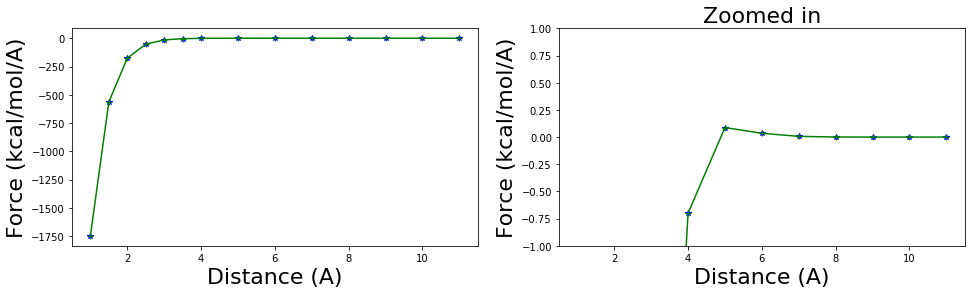

In [4]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

f_morse = [-1747.87564194306,-563.535499273982,-175.419871872027,-52.4333190634618,-14.7200308307996,-3.6859671368853,-0.701065275909301,0.0877099939608028,0.0350397558579287,0.00659288127831217,0.000752283458346312,3.34495355905676e-05,0,0]
f_reax = [-1747.75996573958,-563.49028801878,-175.403239607715,-52.4275152743495,-14.7181227605658,-3.68538831614751,-0.70091148387205,0.0877099025378855,0.0350364246741814,0.00659207546946821,0.000752177652403281,3.34442831993042e-05,-6.62976566042565e-18,0]
d = [1.0,1.5,2.0,2.5,3.0,3.5,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0]

plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.plot(d,f_morse,marker='*',color='b',lw=0)
plt.plot(d,f_reax,marker='+',color='g')
plt.xlabel("Distance (A)",fontsize=22)
plt.ylabel("Force (kcal/mol/A)",fontsize=22)

plt.subplot(122)
plt.title("Zoomed in",fontsize=22)
plt.plot(d,f_morse,marker='*',color='b',lw=0)
plt.plot(d,f_reax,marker='+',color='g')
plt.ylim(-1,1)
plt.xlabel("Distance (A)",fontsize=22)
plt.ylabel("Force (kcal/mol/A)",fontsize=22)
plt.show()

We note that in reaxFF, contributions at the cutoff are included. To be consistent with the pair morse potentials, we did not include these contributions in the pair MST potential.